In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
# Load data

filename = 'haberman.data'
df = pd.read_csv(filename)
# Haberman survival dataset
# first column: pacient's age
# second column: year of operation
# third column: number nodes
# Fourth column: 1 (Surivved) - 2 (Died)
df.columns = ["Age","Year of operation","Nodes", "Result"]
df



,Age,Year of operation,Nodes,Result
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2


In [72]:
#Treat data
# Because logistic regression is binary operator we have to 0 or 1 target values
# We will convert the 2's into 0's to represent that the pacient has died
df.loc[df['Result'] == 2, 'Result'] = 0
df

,Age,Year of operation,Nodes,Result
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,0


In [73]:
# Normalize input data
# Split between train and test sets
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = df[["Age","Year of operation", "Nodes"]]
X = np.array(X)
X = min_max_scaler.fit_transform(X)
Y = df["Result"]
Y = np.array(Y)


X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)


The activate function to make the precitions in logistic regression is the sigmoid function:
$ a\:=\:\frac{1}{1+e^{-z}} $
Where z is igual a output of a linear function of the parameters w and b:
$ z = w^T\cdot x+b $

In [74]:

def sigmoid(z):
    z = np.clip( z, -500, 500 )           # protect against overflow
    return 1.0/(1.0+np.exp(-z))

The cost function used in logistic regression is:
$ J\left(w,\:b\right)\:=-\frac{1}{m}\sum _{i=1}^m\left(ylog\left(a\right)\:+\:\left(1-y\right)\cdot log\left(1-a\right)\right) $
where m is the number of training samples, a is the prediction and y is the actual target value

In [75]:
def logistic_regression_cost(X, y, w, b):
    cost = 0.0
    m = X.shape[0]

    for i in range(m):
        a = sigmoid(np.dot(X[i], w) + b)
        cost += -y[i]*np.log(a) - (1-y[i])*np.log(1-a)
        
    cost = cost / (m)
    
    return cost

def compute_gradient(X, y, w, b):
    
    m, n = X.shape

    dj_dw = np.zeros((n,))
    dj_db = 0.


    for i in range(m):
        a = sigmoid(np.dot(X[i], w) + b)
   
        for j in range(n):
         
            dj_dw[j] += (a - y[i])*X[i,j]
        dj_db += (a - y[i])
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [76]:
def learn_parameters(X, y, w_initial, b_initial, num_iters, lambda_):
      J_cost_history = list()
      w = w_initial
      b = b_initial
      
      
      for i in range(num_iters):
          current_cost = logistic_regression_cost(X, y, w, b)
          J_cost_history.append(current_cost)
          dj_dw, dj_db = compute_gradient(X, y, w, b)
          w = w - lambda_ * dj_dw
          b = b - lambda_ * dj_db
      
      return w, b, J_cost_history
    
num_iters = 4000
lambda_ = 0.1
w_initial = [2.5, 7.0, 1.0]
b_initial = 1.0

w, b, J_cost_history = learn_parameters(X_train, Y_train, w_initial, b_initial, num_iters, lambda_)
print('Final cost', J_cost_history[len(J_cost_history) - 1])
print('Final parameters: ', 'w', w, 'b', b)


Final cost 0.5167184685759099
Final parameters:  w [-0.79608693  0.29450243 -2.44875005] b -1.0027681991856838


Text(0.5, 1.0, 'Cost per iteration')

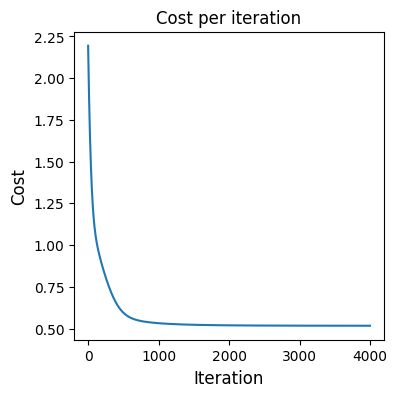

In [77]:
# Visualize cost decreasing by iteration
fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(range(num_iters), J_cost_history)
ax.set_ylabel('Cost', fontsize=12)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_title('Cost per iteration')

In [78]:
# Predict values
def predict_values(X, w, b, threshold):
    m = X.shape[0]
    Y_predicted = list()
    
    for i in range(m):
        
        predicted_y = sigmoid(np.dot(X[i],w) + b)
        predicted_class = 1 if predicted_y >= threshold else 0
        Y_predicted.append(predicted_class)
        
    return np.array(Y_predicted)

Y_predicted = predict_values(X_test, w, b, 0.5)
print('Y_predicted', Y_predicted)
print('Y_test', Y_test)

Y_predicted [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1]
Y_test [0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1
 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1]


In [79]:
# Compute accuracy
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.40      0.07      0.12        27
           1       0.74      0.96      0.84        74

    accuracy                           0.72       101
   macro avg       0.57      0.52      0.48       101
weighted avg       0.65      0.72      0.65       101

